# Module E: Section 3.2 and 3.3 Approximation

## 3.2 Continuity and Differentiation

Example 1: Taking a derivative of f = x^2

In [21]:
from sympy import *

# Symbol x
x = Symbol('x')

# Function f
f = x**2

# Calculating Derivative
derivative_f = f.diff(x)

# Expected output: 2x
print(derivative_f)

2*x


Example 2 and 3: Multivariate differentials

In [22]:
import sympy as sym

# Symbols x and y
x, y = sym.symbols('x y')

# Function f
f = x**2 * y

# Calculating derivative
derivative_f = sym.diff(f,x)

# Expected output: 2xy
print(derivative_f)

# Symbols x, y, and z
x, y, z = sym.symbols('x y z')

# Function f
f = x**2 * y * z**5

# Calculating derivative
derivative_fx = sym.diff(f,x)
derivative_fy = sym.diff(f,y)

# Expected output: 2xyz^5
# Expected output: x^2z^5
print(derivative_fx)
print(derivative_fy)

2*x*y
2*x*y*z**5
x**2*z**5


## 3.3 Unconstrained Optimization

Example 1: Least squares regression

In [23]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

In [24]:
# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

# assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T

# turn y into a column vector
y = y[:, np.newaxis]

# Direct least square regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print(alpha)

[[1.47037306]
 [1.00054715]]


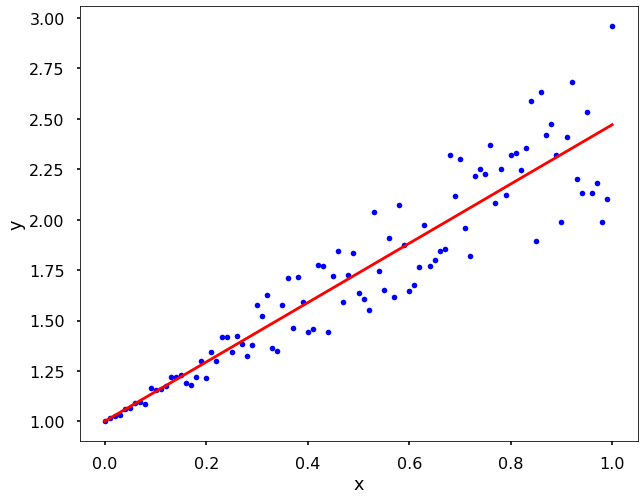

In [25]:
# plot the results
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Example 2: Using the pseudoinverse

In [26]:
pinv = np.linalg.pinv(A)
alpha = pinv.dot(y)
print(alpha)

[[1.47037306]
 [1.00054715]]


Example 3: using numpy.linalg.lstsq

In [27]:
alpha = np.linalg.lstsq(A, y, rcond=None)[0]
print(alpha)

[[1.47037306]
 [1.00054715]]


Example 4: Use optimize.curve_fit from scipy

In [28]:
# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

def func(x, a, b):
    y = a*x + b
    return y

alpha = optimize.curve_fit(func, xdata = x, ydata = y)[0]
print(alpha)

[1.46433035 1.01001804]
